Sleep Health and Lifestyle Dataset

In [1]:
from google.colab import files

uploaded = files.upload()



Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest

EDA:

In [4]:


#load dataset
df = pd.read_csv(io.BytesIO(uploaded['Sleep_health_and_lifestyle_dataset.csv']))
'''print(df)'''

# Dataset Structure
print(df.shape)
print()

# basic statistics
print(df.describe())
print()

# statistics of the object datatype data
print(df.describe(include='object'))
print()

# Define data types of all columns
df.info()
print()

# print the unique values or the categories of categorical fwatures:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print(df[column].unique())
        print()

# check for invalid values:

# 1: missing values for each column
print(df.isnull().sum())
print()
# Handle missing values : Replace missing values with "no disorder"
df.fillna("no disorder", inplace=True)
print("Sleep Disorder")
print(df['Sleep Disorder'].unique())
print()

#2: In BMI the "Normal" and "Normal Weight" have the same meaning. One of them must be changed.
# replacing the "Normal Weight" category to "Normal"
df['BMI Category']= df['BMI Category'].replace('Normal Weight','Normal')
print("BMI Category")
print(df['BMI Category'].unique())
print()

(374, 13)

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                 

visualization

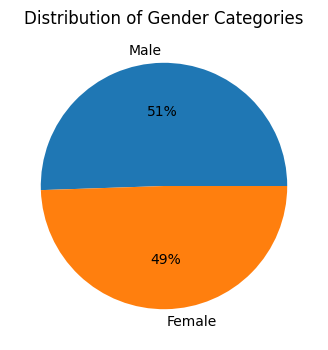

In [5]:
# Gender distribution
gender = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender, labels=gender.index, autopct='%.0f%%')
plt.title('Distribution of Gender Categories')
plt.show()

Hypothesis test

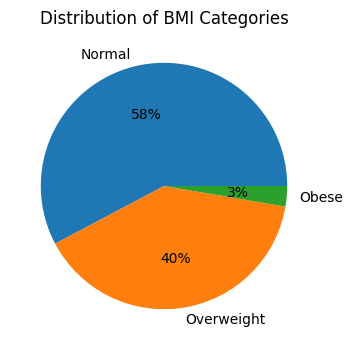

In [6]:
#Distribution of BMI categories
bmi_counts = df['BMI Category'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%.0f%%')
plt.title('Distribution of BMI Categories')
plt.show()

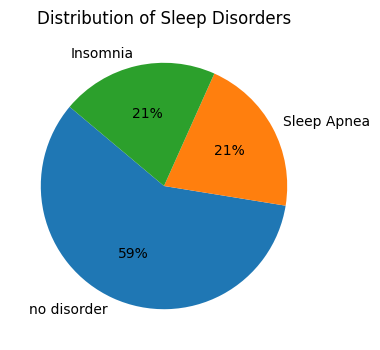

In [7]:
# Distribution of Sleep Disorder
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Sleep Disorders')
plt.show()

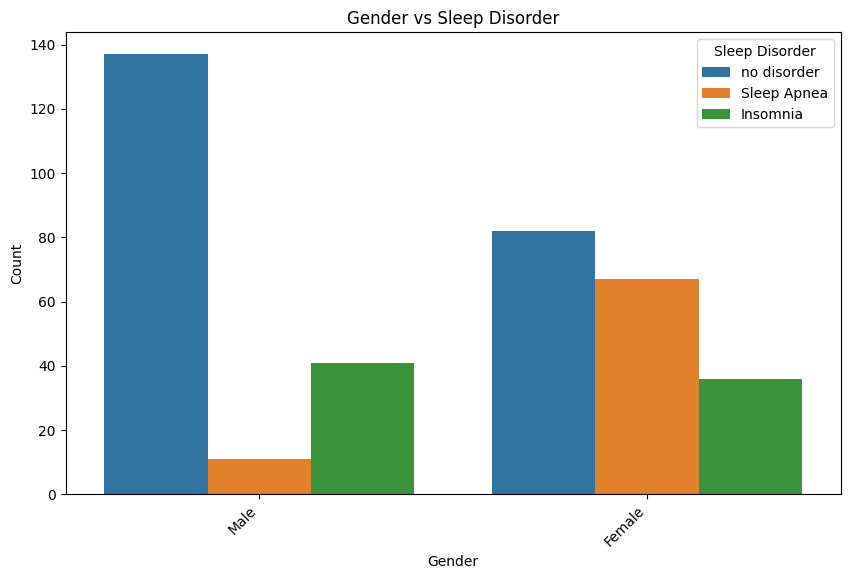

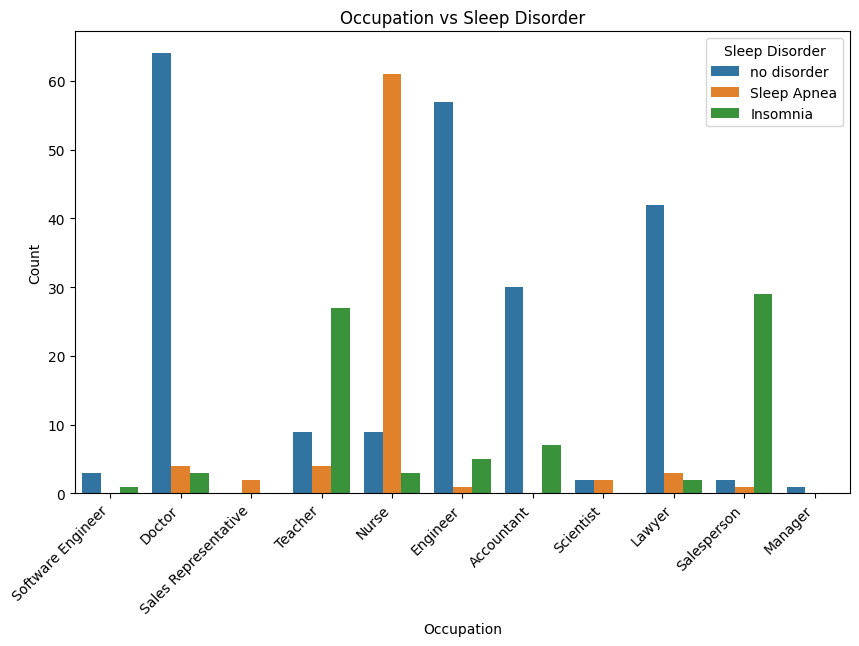

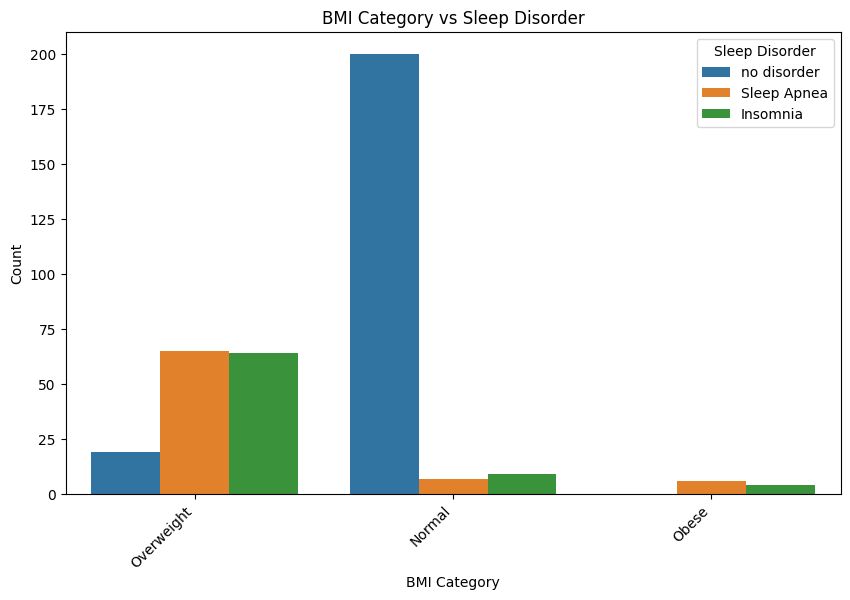

In [20]:
# Plot each categorical feature against Sleep Disorder
features = ['Gender', 'Occupation', 'BMI Category']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Sleep Disorder', data=df)
    plt.title(feature + ' vs Sleep Disorder')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sleep Disorder')
    plt.show()
    print()

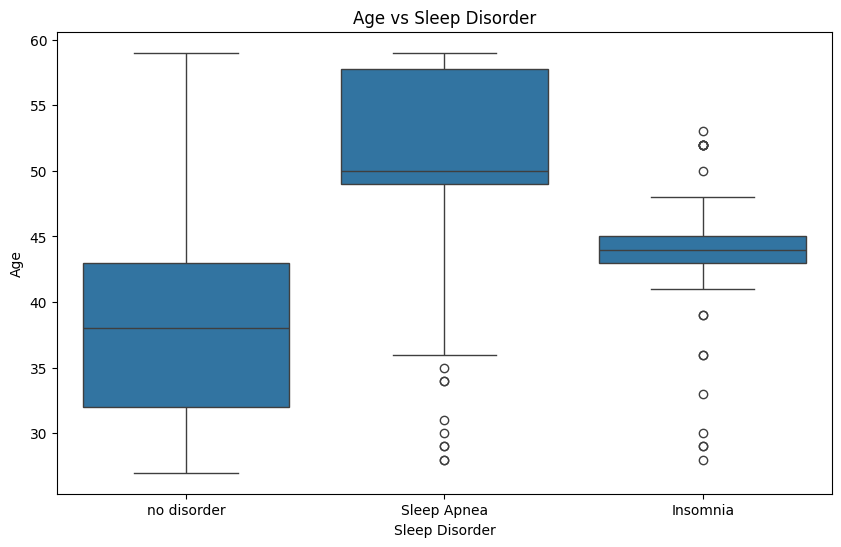

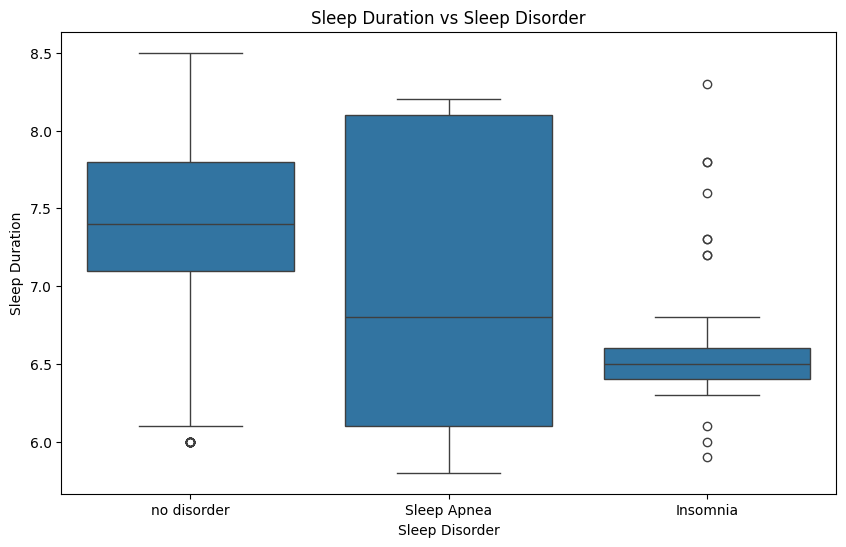

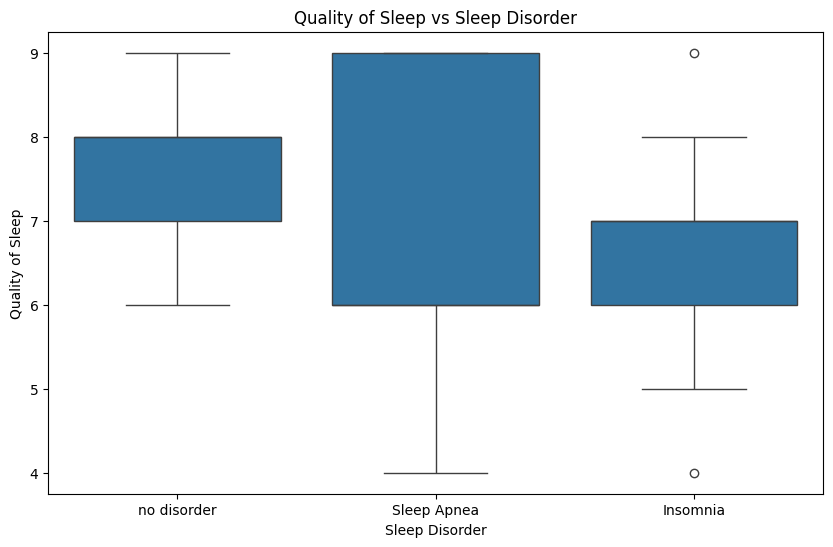

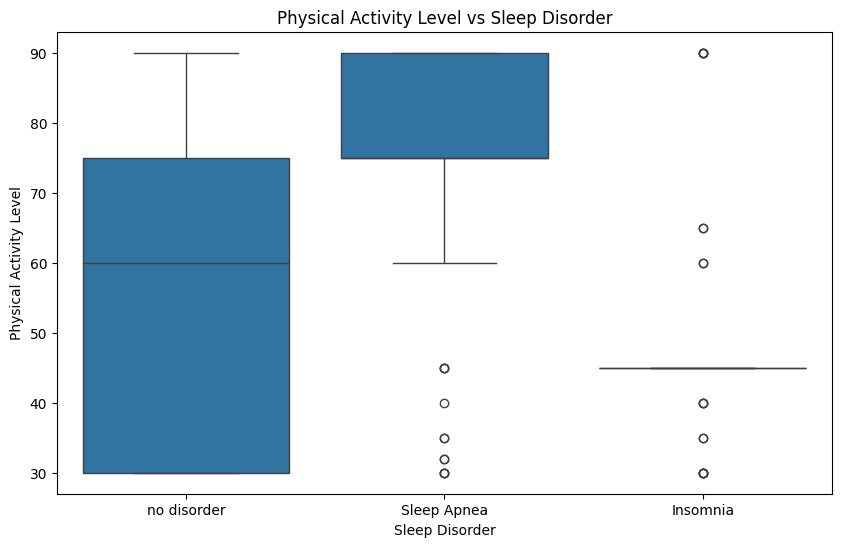

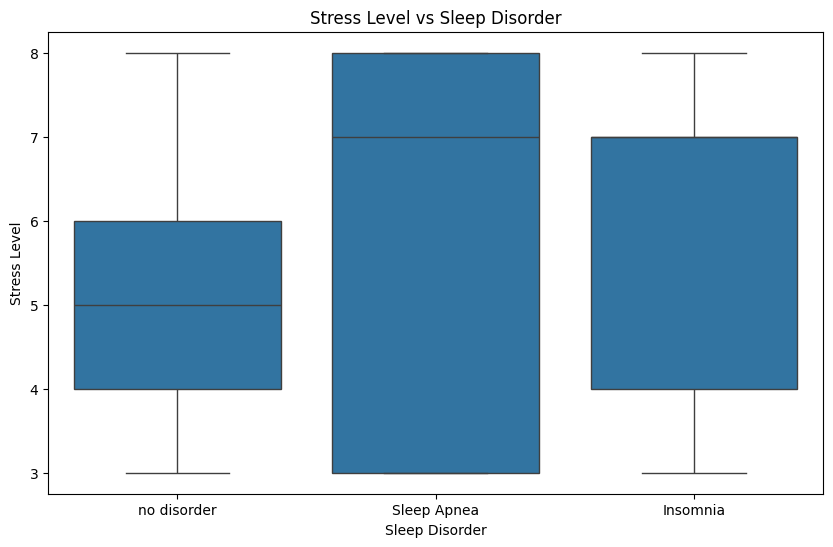

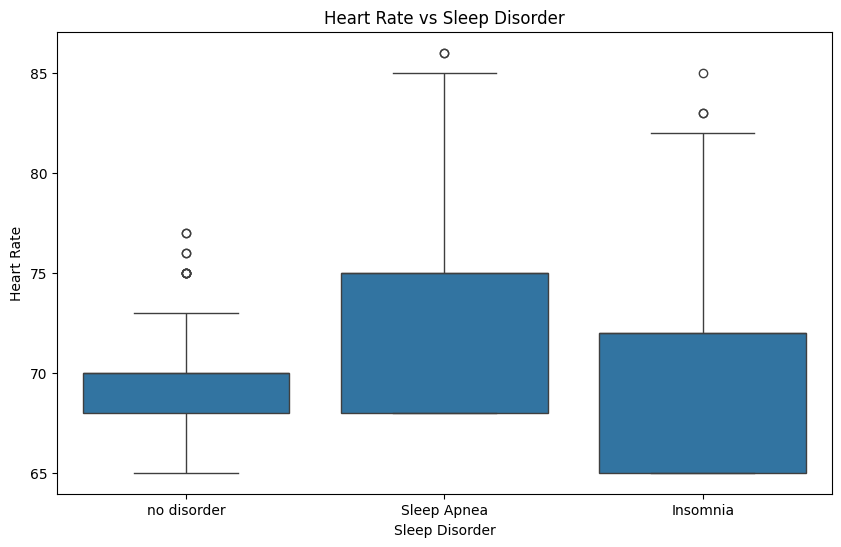

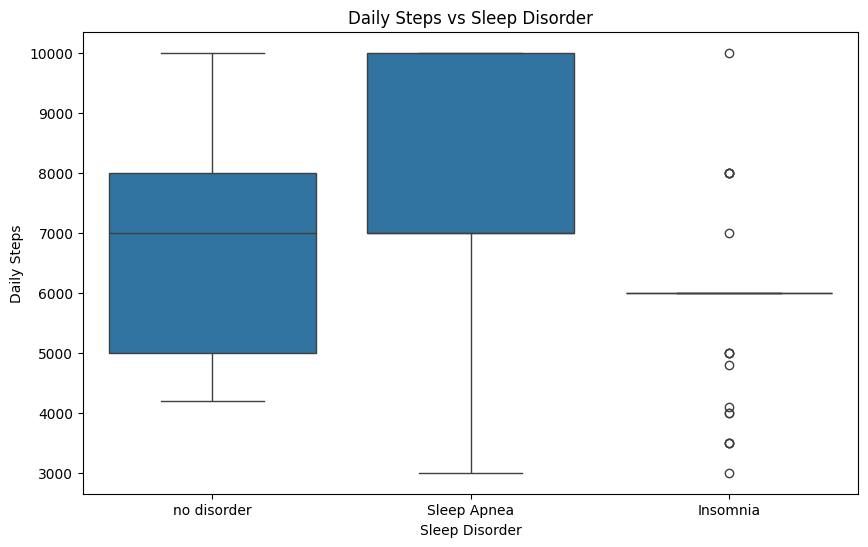

In [21]:
# Plot each numerical feature against Sleep Disorder
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sleep Disorder', y=feature, data=df)
    plt.title(feature + ' vs Sleep Disorder')
    plt.xlabel('Sleep Disorder')
    plt.ylabel(feature)
    plt.show()
    print()

Hypothesis testing:

  A:
  
  Null Hypothesis : Women's sleep duration follows a normal distribution.

  Alternative Hypothesis : Women's sleep duration does not follow a normal distribution.

Shapiro-Wilk Test Statistic:
0.8985763558917751

p-value:
6.360571286948505e-10

Reject the H0.



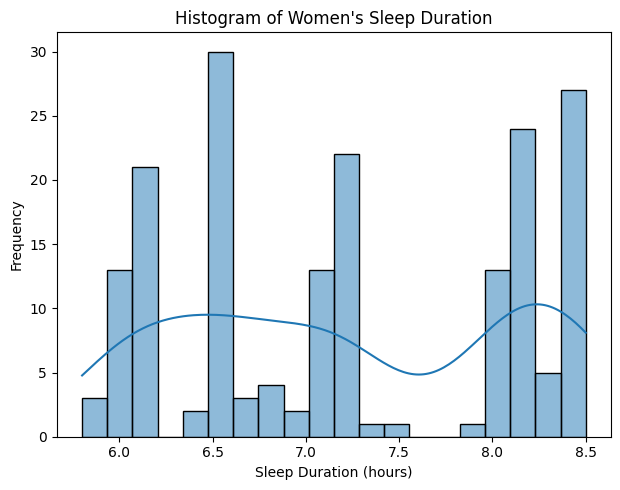

In [23]:
# a:Does women’s sleep duration follow a normal distribution?

women_sleep_duration = df[df["Gender"] == "Female"]["Sleep Duration"]

#Shapiro-Wilk normality test
print("Shapiro-Wilk Test Statistic:")
print(stats.shapiro(women_sleep_duration).statistic)
print()
print("p-value:")
print(stats.shapiro(women_sleep_duration).pvalue)
print()

if stats.shapiro(women_sleep_duration).pvalue < 0.05:
    print("Reject the H0.")
    print()
else:
    print("Fail to reject the H0")
    print()
 # Visualization
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(women_sleep_duration, bins=20, kde=True)
plt.title("Histogram of Women's Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Since the p-value is less than 0.05 so H0 doesn't hold.

B:

Null Hypothesis (H₀): There is no significant correlation between Daily Steps and Quality of Sleep.

Alternative Hypothesis (H₁): There is a significant correlation between Daily Steps and Quality of Sleep.

Pearson Correlation Coefficient:
0.01679141492471678

p-value:
0.7461906652961119

Fail to reject the H0


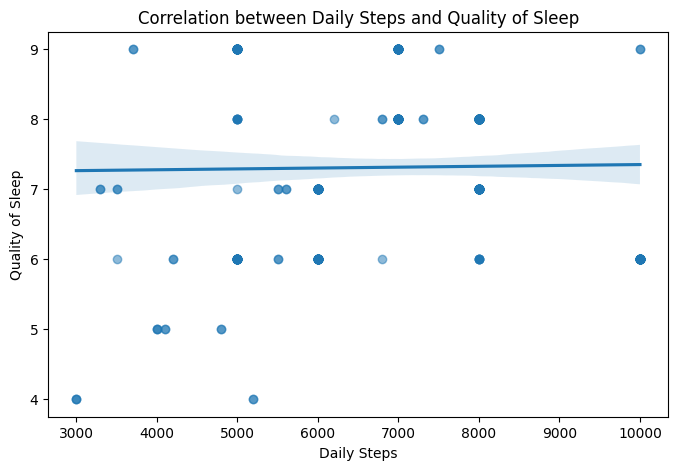

In [25]:
# b: Is having higher daily steps a contributing factor into better sleep? Check the corresponding correlation of Daily Steps and Quality of Sleep.

daily_steps = df["Daily Steps"]
quality_of_sleep = df["Quality of Sleep"]

# Pearson correlation test
corr_coefficient, p_value = stats.pearsonr(df["Daily Steps"],df["Quality of Sleep"])

print("Pearson Correlation Coefficient:")
print(corr_coefficient)
print()
print("p-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the H0.")
    print()
else:
    print("Fail to reject the H0")
    print()

# Scatter plot
plt.figure(figsize=(8, 5))
sns.regplot(x=daily_steps, y=quality_of_sleep, scatter_kws={'alpha':0.5})
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep")
plt.title("Correlation between Daily Steps and Quality of Sleep")
plt.show()



Since p-value is higher than 0.05 then Fail to reject the null hypothesis: No significant correlation found.

C:

h0: There is no statistically significant difference in stress levels among different occupations.

h1:Stress levels differ significantly among occupations.

H-statistic
136.39693171205218

p-value:
2.304155098706687e-24

Reject the H0.



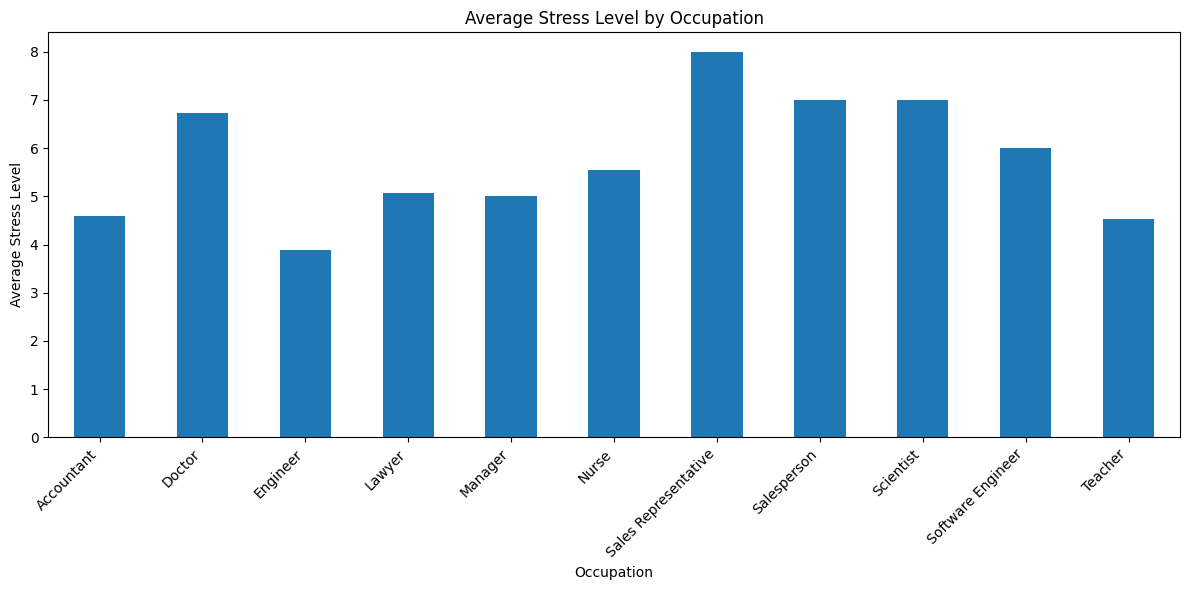

In [29]:
# c: Is stress level different among different occupations? First, check this hypothesis with a test, and then compute the average stress level among different occupations. Use a bar chart or any other desired visualization method to demonstrate the result.

occupations = []
for name, group in df.groupby('Occupation'):
    occupations.append(group['Stress Level'].values)

# the test
stat, p = stats.kruskal(*occupations)

print("H-statistic")
print(stat)
print()
print("p-value:")
print(p)
print()

if p <0.05:
    print("Reject the H0.")
    print()
else:
    print("Fail to reject the H0")
    print()

# average stress levels
avg = df.groupby('Occupation')['Stress Level'].mean()

#  Visualization
plt.figure(figsize=(12, 6))
avg.plot(kind='bar')
plt.title('Average Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Since the p-value is less than 0.05 so H0 doesn't hold.

D:

h0: No significant difference in blood pressure among BMI groups

h1:Blood pressure differs significantly across BMI groups.

Systolic nH-statistic
215.78340584354038

p-value:
1.390685024254713e-47

Diastolic nH-statistic
220.8054883352936

p-value:
1.1290090443421815e-48

Reject the H0.



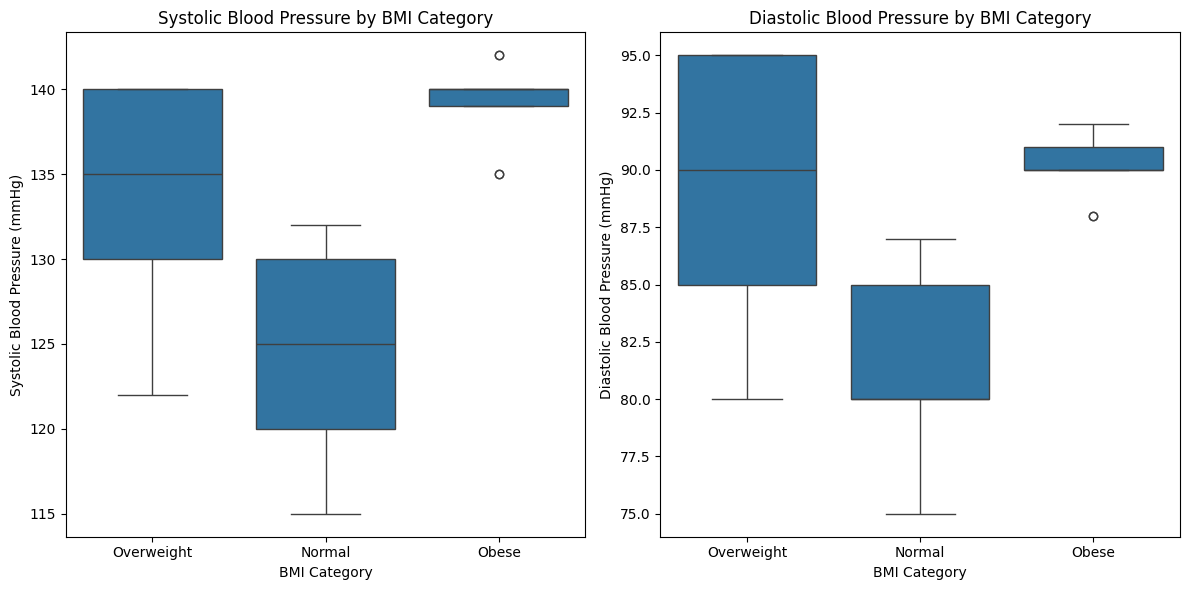

In [30]:
# Split 'Blood Pressure' into systolic and diastolic columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

#  Kruskal-Wallis test for systolic and diastolic BP
def kruskal_test(data, column, group_column='BMI Category'):
    groups = []
    for name, group in data.groupby(group_column):
        groups.append(group[column].values)
    stat, p = stats.kruskal(*groups)
    return stat, p

# Test systolic BP
stat_sys, p_sys = kruskal_test(df, 'Systolic')

print("Systolic H-statistic")
print(stat_sys)
print()
print("p-value:")
print(p_sys)
print()

# Test diastolic BP
stat_dia, p_dia = kruskal_test(df, 'Diastolic')

print("Diastolic H-statistic")
print(stat_dia)
print()
print("p-value:")
print(p_dia)
print()


if p_sys < 0.05 or p_dia < 0.05:
    print("Reject the H0.")
    print()
else:
    print("Fail to reject the H0")
    print()

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='BMI Category', y='Systolic', data=df)
plt.title('Systolic Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Systolic Blood Pressure (mmHg)')

plt.subplot(1, 2, 2)
sns.boxplot(x='BMI Category', y='Diastolic', data=df)
plt.title('Diastolic Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

E:

Null Hypothesis (H₀):There is no difference in median heart rates between people with and without sleep disorders.

Alternative Hypothesis (H₁):
People with sleep disorders have higher median heart rates than those without.

statistic
22399.0

p-value:
3.958042595485781e-08

Reject the H0.


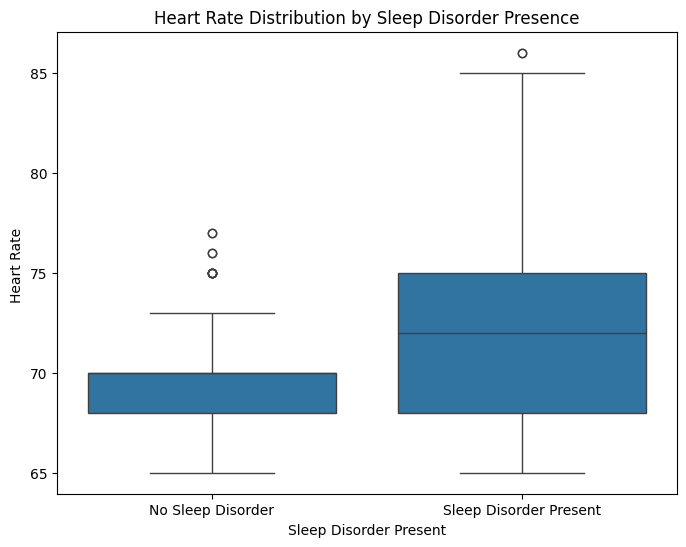

In [31]:
#E:

df['Sleep Disorder Present'] = df['Sleep Disorder'] != 'no disorder'

disorder= df[df['Sleep Disorder Present']]['Heart Rate']
no_disorder = df[~df['Sleep Disorder Present']]['Heart Rate']

#  Mann-Whitney U test
stat, p = stats.mannwhitneyu(disorder, no_disorder, alternative='greater')

print("statistic")
print(stat)
print()
print("p-value:")
print(p)
print()

if p < 0.05:
    print("Reject the H0.")
else:
    print("Fail to reject the H0")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder Present', y='Heart Rate', data=df)
plt.title('Heart Rate Distribution by Sleep Disorder Presence')
plt.xlabel('Sleep Disorder Present')
plt.ylabel('Heart Rate ')
plt.xticks([0, 1], ['No Sleep Disorder', 'Sleep Disorder Present'])
plt.show()

Bonus Hypothesis testing:

1.

Null Hypothesis (H₀):There is no significant difference between the means of Sleep Duration and Quality of Sleep

Alternative Hypothesis (H₁):There is a significant difference between the means of Sleep Duration and Quality of Sleep.
  
SIGNIFICANCE LEVEL: 0.05


z-statistic
-2.432033681094019

p-value:
0.015014311061261587

Reject H₀



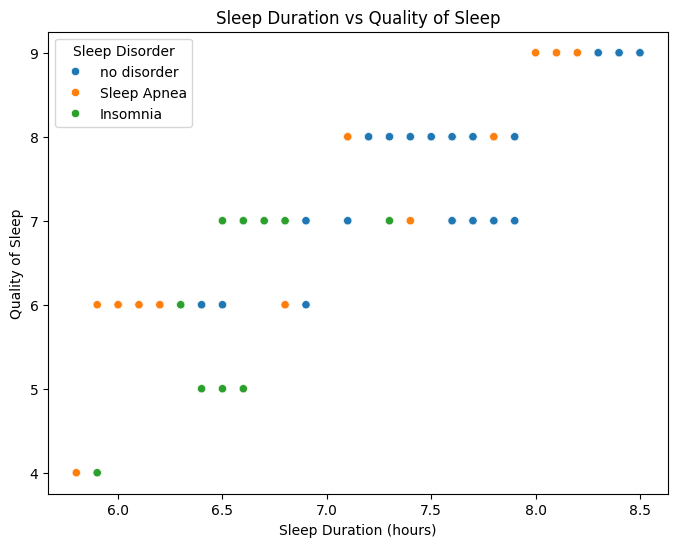

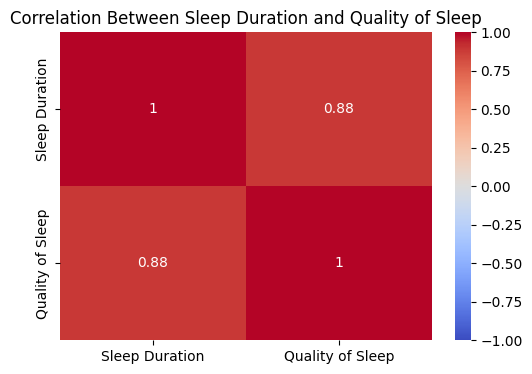

In [32]:
duration = df['Sleep Duration']
quality= df['Quality of Sleep']

# Z-test
z_stat, p_value = ztest(duration, quality, value=0)

print("z-statistic")
print(z_stat)
print()
print("p-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject H₀")
    print()
else:
    print("Fail to reject H₀.")
    print()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=duration, y=quality, hue=df['Sleep Disorder'])
plt.title('Sleep Duration vs Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.legend(title='Sleep Disorder')
plt.show()
print()

# Correlation
plt.figure(figsize=(6, 4))
corr = df[['Sleep Duration', 'Quality of Sleep']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Sleep Duration and Quality of Sleep')
plt.show()

INCE Pvalue = 0.015< 0.05,

we reject the null hypothesis that says there is no difference between the average sleep duration and Quality Of sleep.

2.

Null Hypothesis: there is no difference in sleep quality of males and females.

Alternative Hypothesis: there is a difference in sleep quality of males and females.

Significance Level alpha = 0.05

t-statistic
-5.874547760454642

p-value:
9.416446532689304e-09

Reject H₀.



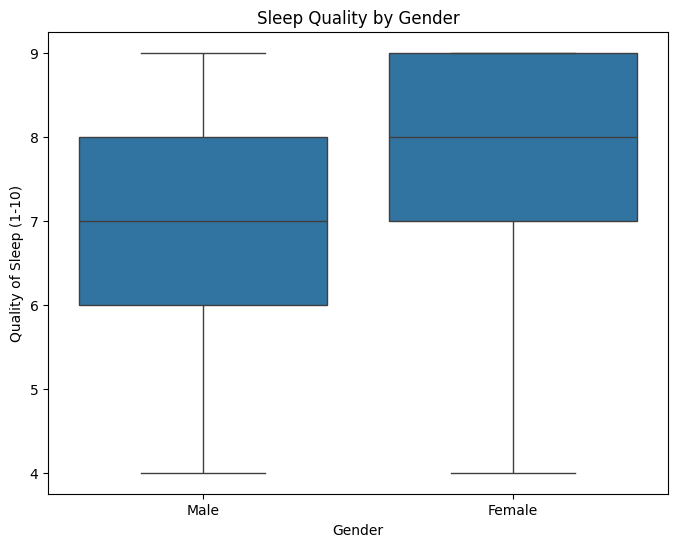

In [34]:
male_quality = df[df['Gender'] == 'Male']['Quality of Sleep']
female_quality = df[df['Gender'] == 'Female']['Quality of Sleep']

# t-test (assuming normality and equal variances)
t_stat, p_value = stats.ttest_ind(male_quality, female_quality)

print("t-statistic")
print(t_stat)
print()
print("p-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject H₀.")
    print()
else:
    print("Fail to reject H₀.")
    print()

# plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Quality of Sleep', data=df)
plt.title('Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep (1-10)')
plt.show()

Hence proved that there is a statistically significant difference between the average sleep quality of males and females.

Females have a better sleep quality compared to males.

3.

Null Hypothesis (H₀): There is no relationship between physical activity level and sleep quality.

Alternative Hypothesis (H₁): There is a relationship between physical activity level and sleep quality.

Coefficient
0.19289645493975321

p-value:
0.00017454895247838838

Reject H₀



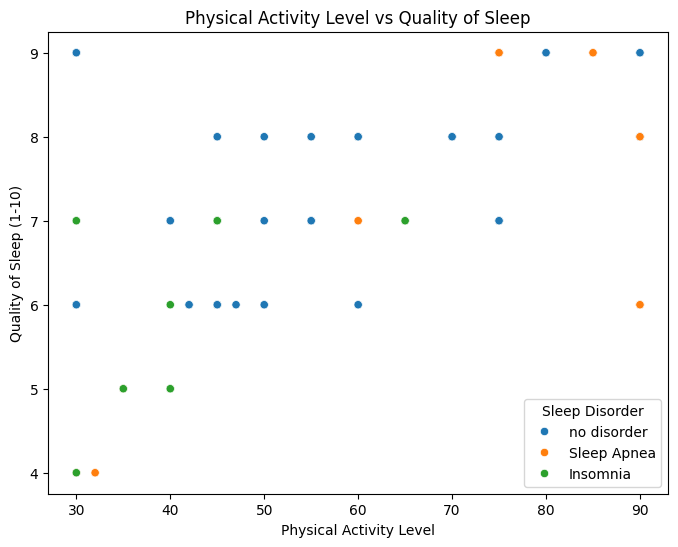

In [35]:
physical_activity = df['Physical Activity Level']
sleep_quality = df['Quality of Sleep']

# Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(physical_activity, sleep_quality)

print("Coefficient")
print(corr)
print()
print("p-value:")
print(p_value)
print()

if p_value < 0.05:
    print("Reject H₀")
    print()
else:
    print("Fail to reject H₀")
    print()
#  plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=physical_activity, y=sleep_quality, hue=df['Sleep Disorder'])
plt.title('Physical Activity Level vs Quality of Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep (1-10)')
plt.legend(title='Sleep Disorder')
plt.show()


Student Performance Factors Dataset

In [36]:
from google.colab import files

uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [37]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest

EDA:

In [38]:
#load dataset
ds = pd.read_csv(io.BytesIO(uploaded['StudentPerformanceFactors.csv']))
'''print(ds)'''

# Dataset Structure
print(ds.shape)
print()

# basic statistics
print(ds.describe())
print()

# statistics of the object datatype data
print(ds.describe(include='object'))
print()

# Define data types of all columns
ds.info()
print()

# print the unique values or the categories of categorical fwatures:
for column in ds.columns:
    if ds[column].dtype == 'object':
        print(column)
        print(ds[column].unique())
        print()

# 1: missing values for each column
print(ds.isnull().sum())
print()

# Drop rows with ANY missing values because the whole percentage of them is around 3%.
cleaned_ds = ds.dropna()
print(f"Original shape: {ds.shape}")
print(f"New shape: {cleaned_ds.shape}")

(6607, 20)

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000      

visualization

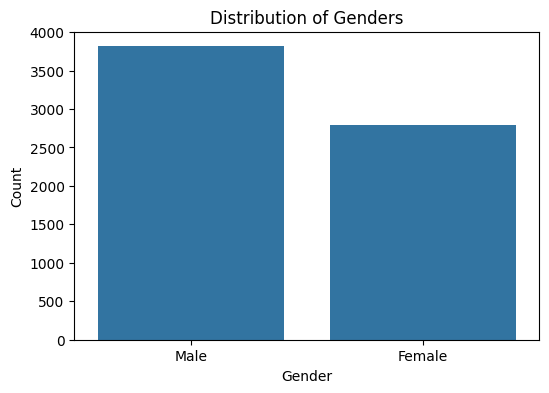

In [39]:
# Plot the distribution of genders
gender_counts = ds['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

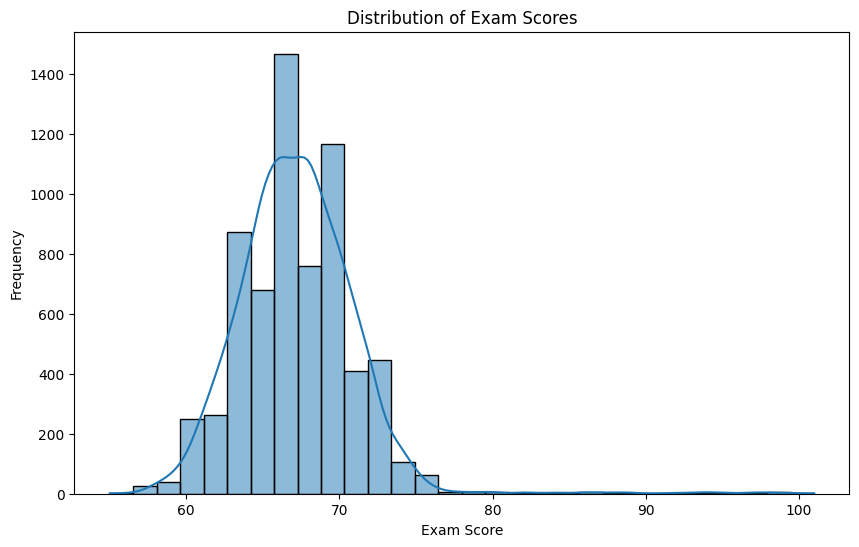

In [40]:
# Plot the distribution of exam scores
plt.figure(figsize=(10, 6))
sns.histplot(ds['Exam_Score'], kde=True, bins=30)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

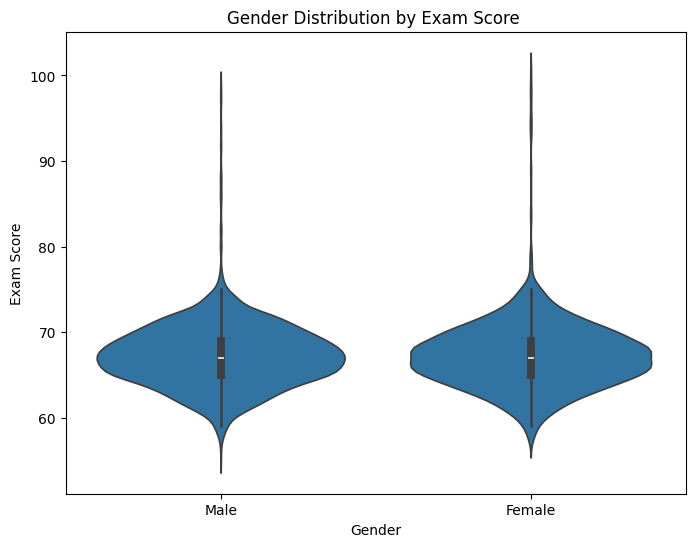

In [41]:
# plot for gender distribution by score
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Exam_Score', data=ds)
plt.title('Gender Distribution by Exam Score ')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

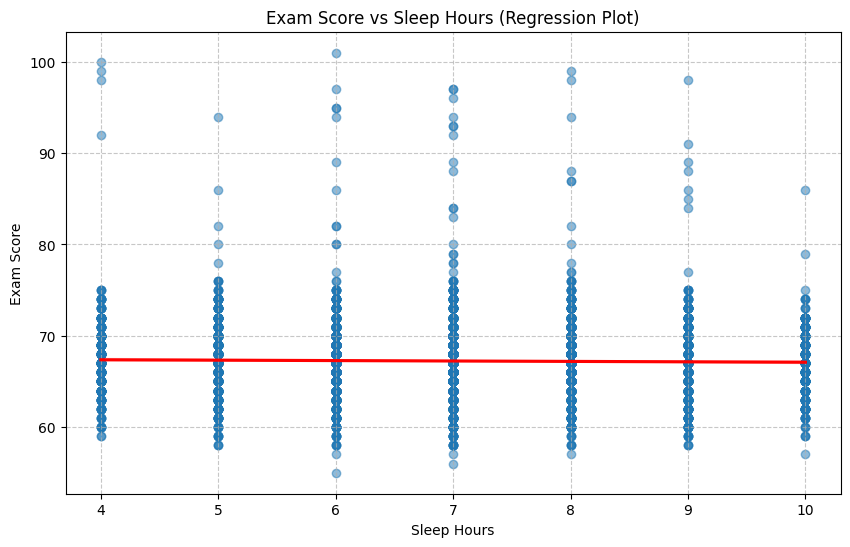

In [44]:
#  plot for exam score vs sleep hours
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep_Hours', y='Exam_Score', data=ds, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Exam Score vs Sleep Hours (Regression Plot)')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<ipython-input-47-9eb75abf34cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Exam_Score', data=ds, palette='pastel')
<ipython-input-47-9eb75abf34cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Exam_Score', data=ds, palette='pastel')
<ipython-input-47-9eb75abf34cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Exam_Score', data=ds, palette='pastel')
<ipython-input-47-9eb75abf34cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

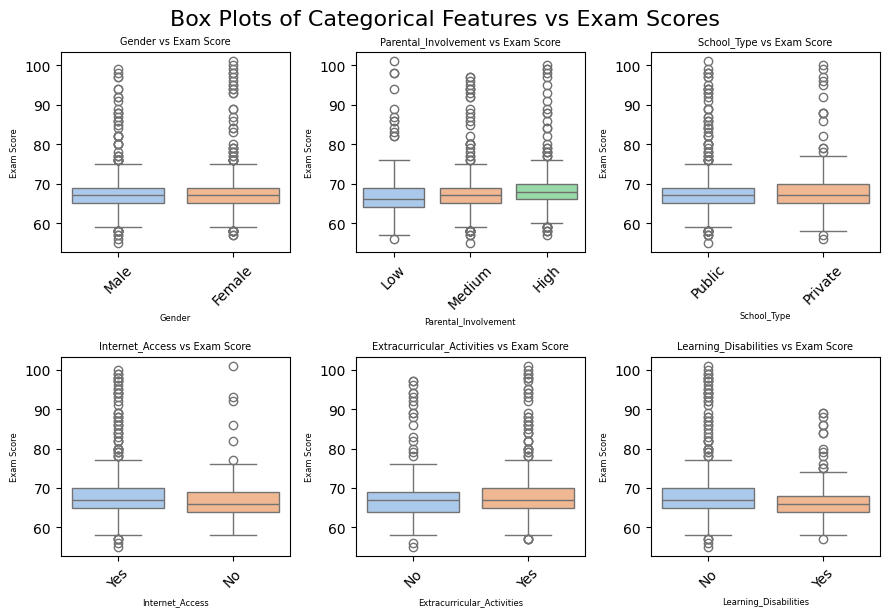

In [47]:
# plot all categorical features in a single figure

features = ['Gender', 'Parental_Involvement', 'School_Type', 'Internet_Access', 'Extracurricular_Activities', 'Learning_Disabilities']

# Create a grid of plots for each categorical feature
num_features = len(features)
plt.figure(figsize=(9, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='Exam_Score', data=ds, palette='pastel')
    plt.title(feature+' vs Exam Score', fontsize=7)
    plt.xlabel(feature, fontsize=6)
    plt.ylabel('Exam Score', fontsize=6)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Box Plots of Categorical Features vs Exam Scores', y=1.02, fontsize=16)
plt.show()

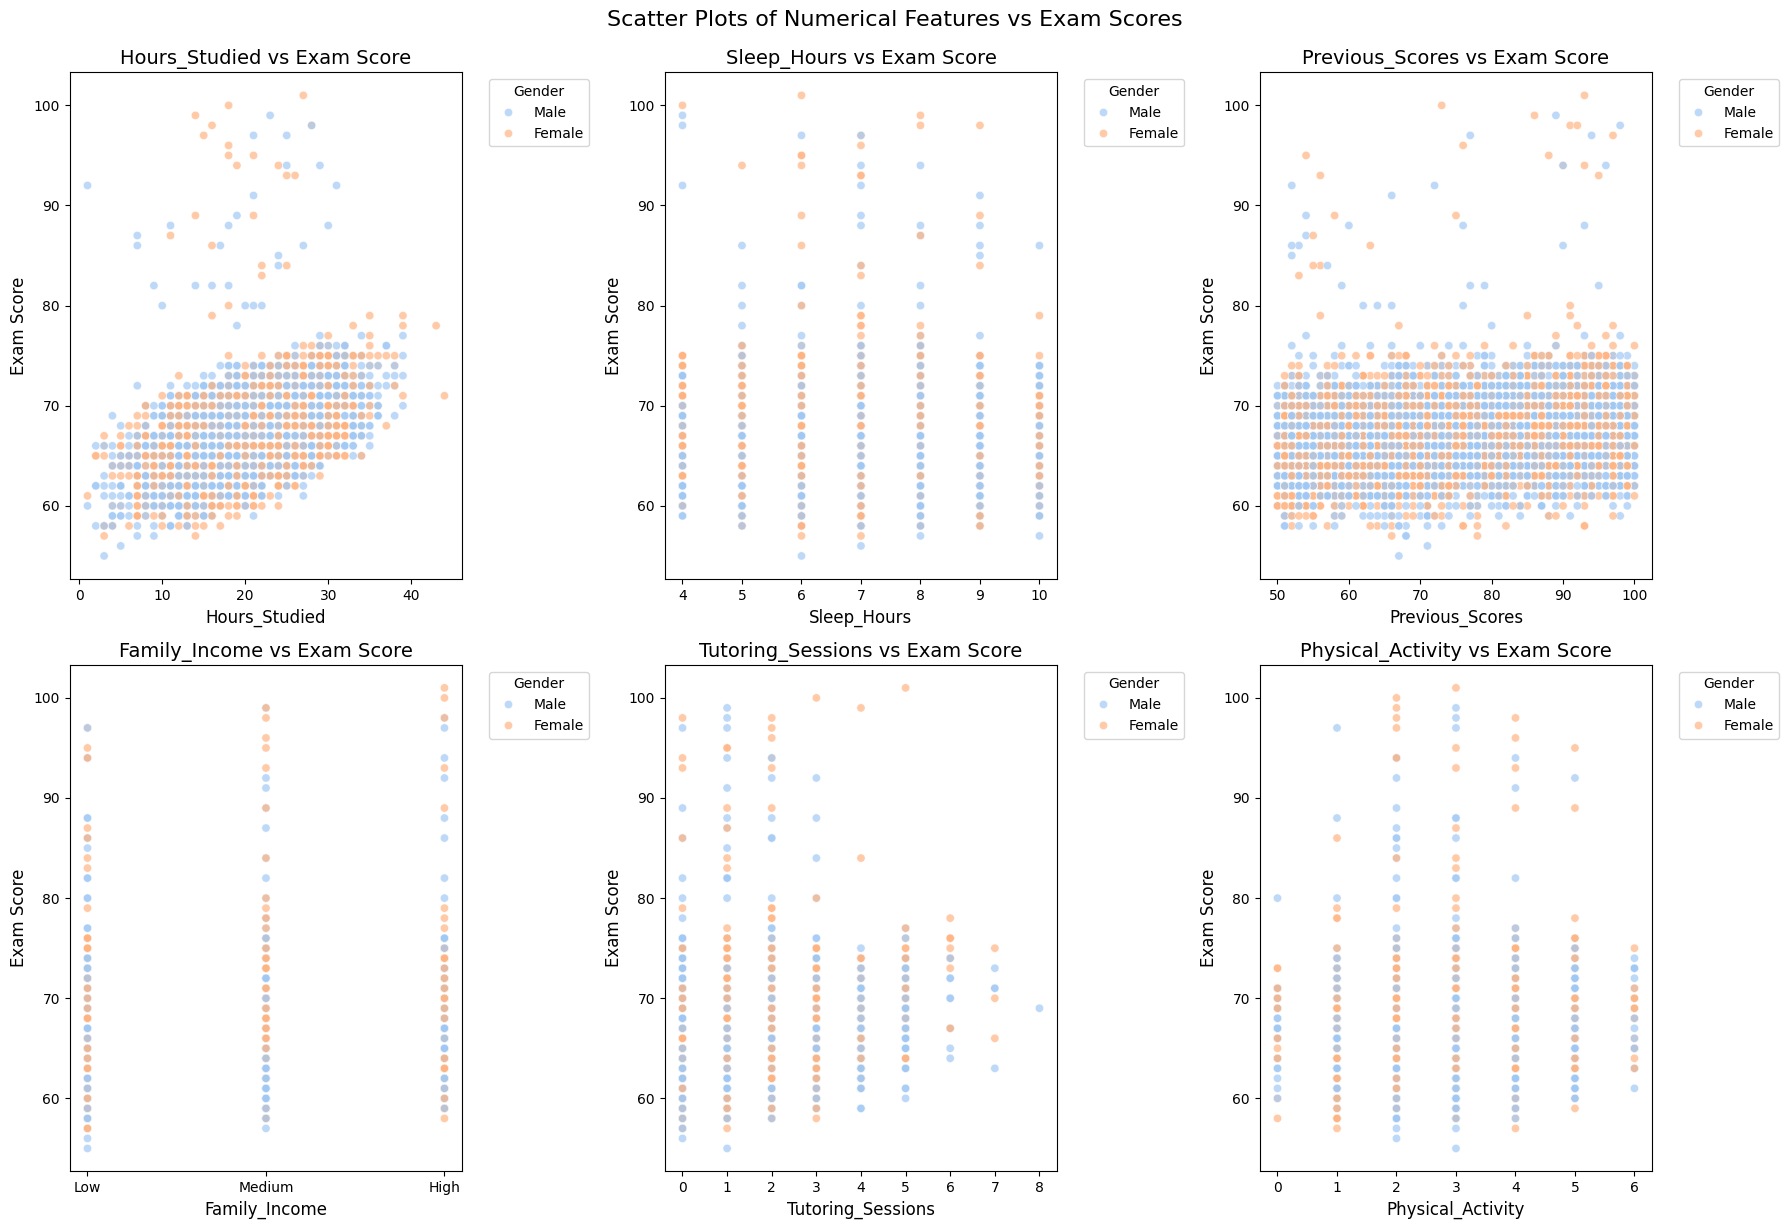

In [48]:
# plot all numerical features in a single figure
features = ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Family_Income', 'Tutoring_Sessions', 'Physical_Activity']

# Create a grid of plots for each numerical feature
num_features = len(features)
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Exam_Score', data=ds, hue='Gender', palette='pastel', alpha=0.7)
    plt.title(feature+' vs Exam Score', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Exam Score', fontsize=12)
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Scatter Plots of Numerical Features vs Exam Scores', y=1.02, fontsize=16)
plt.show()

Hypothesis test

1:

Null Hypothesis (H₀): There is no significant difference in exam scores between males and females.

Alternative Hypothesis (H₁): There is a significant difference in exam scores between males and females.

T-statistic
-0.16516987601406408

p-value:
0.8688153297340319

Fail to reject the null hypothesis



<ipython-input-49-b89db796532f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Exam_Score', data=ds, palette='pastel')


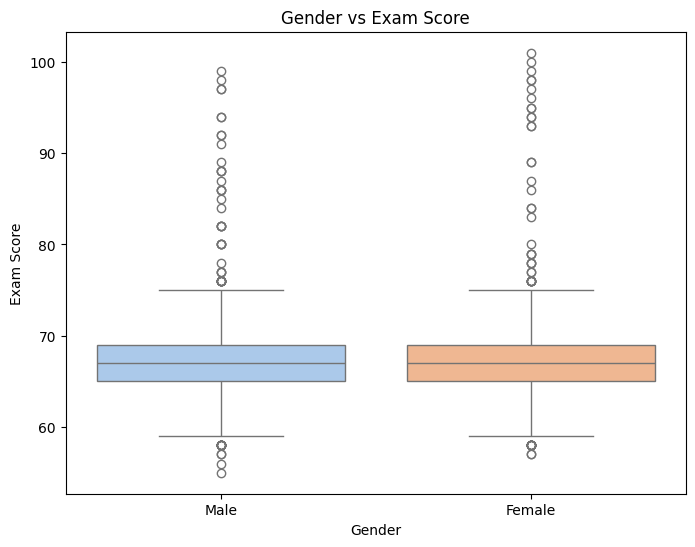

In [49]:
from scipy.stats import ttest_ind

male_scores = ds[ds['Gender'] == 'Male']['Exam_Score']
female_scores = ds[ds['Gender'] == 'Female']['Exam_Score']

# t-test
t_stat, p_value = ttest_ind(male_scores, female_scores)

print("T-statistic")
print(t_stat)
print()
print("p-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=ds, palette='pastel')
plt.title('Gender vs Exam Score')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

2:

Null Hypothesis (H0): The exam scores are normally distributed.

Alternative Hypothesis (H1): The exam scores are not normally distributed.

statistic
0.9029140953482367

p-value:
8.4304278588705e-54

Reject the null hypothesis



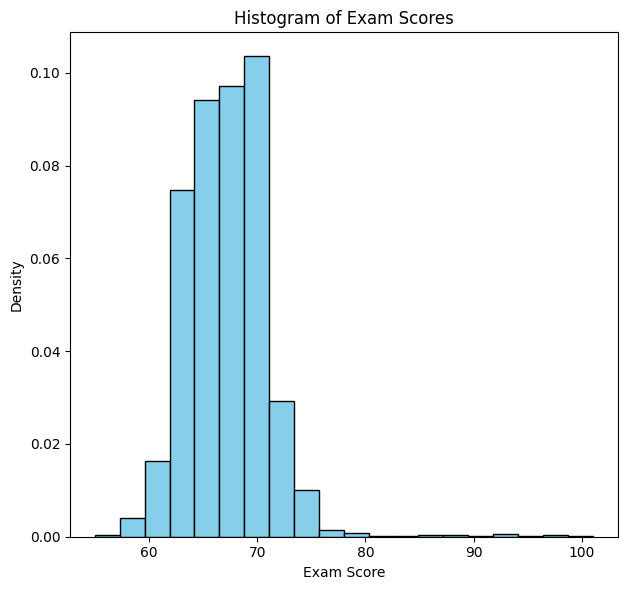

In [52]:
from scipy.stats import shapiro
exam_scores = ds['Exam_Score']

# Shapiro-Wilk test
stat, p = shapiro(exam_scores)

print("statistic")
print(stat)
print()
print("p-value:")
print(p)
print()


if p < 0.05:
    print("Reject the null hypothesis")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()

# Plot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(exam_scores, bins=20, edgecolor='black', color='skyblue', density=True)
plt.title('Histogram of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')


# Show the plots
plt.tight_layout()
plt.show()

3:

Null Hypothesis (H0): There is no significant correlation between hours studied and exam scores.

Alternative Hypothesis (H1): There is a significant correlation between hours studied and exam scores.

Coefficient
0.44545495407528185

p-value:
1.28635e-319

Reject the null hypothesis



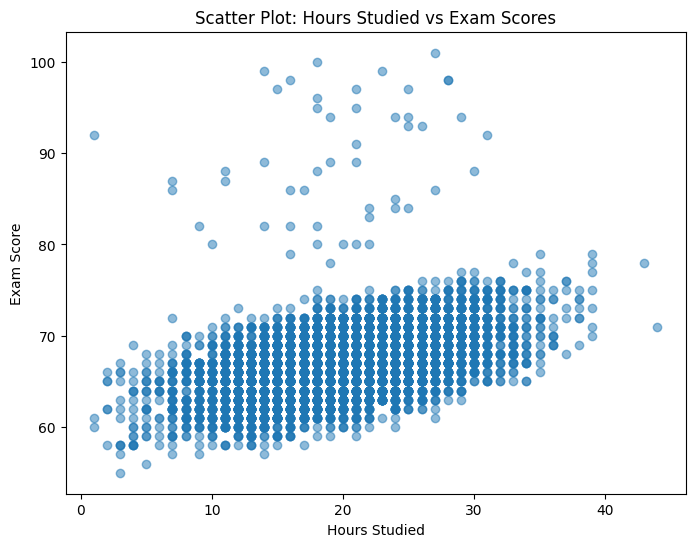

In [53]:

hours_studied = ds['Hours_Studied']
exam_scores = ds['Exam_Score']

#  Pearson's correlation test
corr_coef, p_value = stats.pearsonr(hours_studied, exam_scores)

print("Coefficient")
print(corr_coef)
print()
print("p-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, exam_scores, alpha=0.5)
plt.title('Scatter Plot: Hours Studied vs Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')


plt.show()

4:

Null Hypothesis (H0): There is no significant difference in the median exam scores across different levels of parental involvement.

Alternative Hypothesis (H1): There is a significant difference in the median exam scores across different levels of parental involvement.

H-statistic
195.9244961378635

p-value:
2.8545406295009852e-43

Reject the null hypothesis



<ipython-input-54-5aab260d672b>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([low, medium, high],


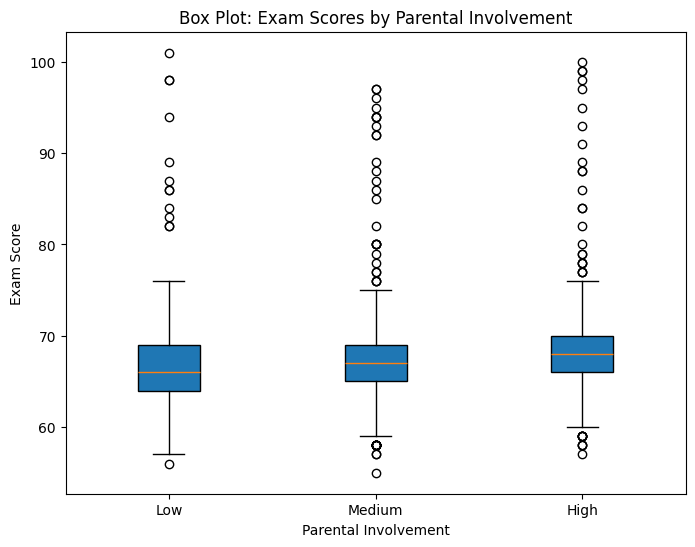

In [54]:

low = ds[ds['Parental_Involvement'] == 'Low']['Exam_Score']
medium = ds[ds['Parental_Involvement'] == 'Medium']['Exam_Score']
high = ds[ds['Parental_Involvement'] == 'High']['Exam_Score']

# Perform the Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(low, medium, high)

print("H-statistic")
print(h_stat)
print()
print("p-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()
# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot([low, medium, high],
            labels=['Low', 'Medium', 'High'],
            patch_artist=True,
            )
plt.title('Box Plot: Exam Scores by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

5:

Null Hypothesis (H0): There is no significant difference in the median exam scores between students from public and private schools.

Alternative Hypothesis (H1): There is a significant difference in the median exam scores between students from public and private schools.

U-statistic
4552099.5

p-value:
0.3485872249726576

Fail to reject the null hypothesis



<ipython-input-55-a5d594ef480e>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([public_scores, private_scores],


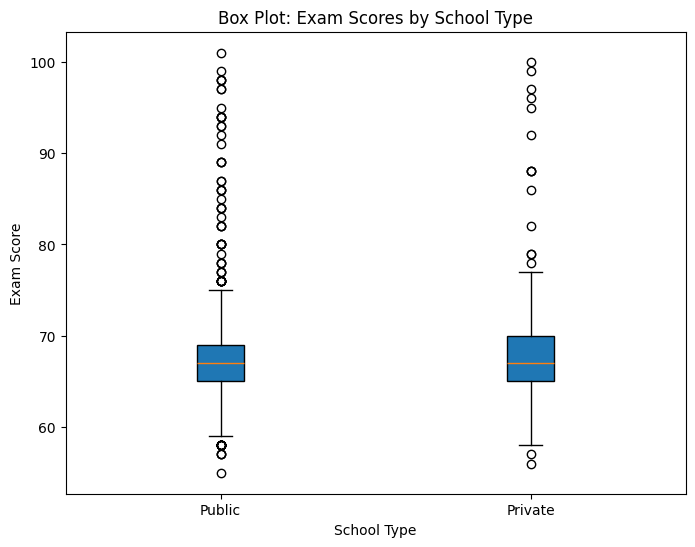

In [55]:

public_scores = ds[ds['School_Type'] == 'Public']['Exam_Score']
private_scores = ds[ds['School_Type'] == 'Private']['Exam_Score']

#  Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(public_scores, private_scores)

print("U-statistic")
print(u_stat)
print()
print("p-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot([public_scores, private_scores],
            labels=['Public', 'Private'],
            patch_artist=True,
            )
plt.title('Box Plot: Exam Scores by School Type')
plt.xlabel('School Type')
plt.ylabel('Exam Score')
plt.show()